In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
X = 2 * np.random.rand(100, 1) # vector of 100 rows and 1 column
y = 4 + 3 * X + np.random.randn(100, 1) # randn creates a sample from the standard normal distribution (used as Gaussian noise)

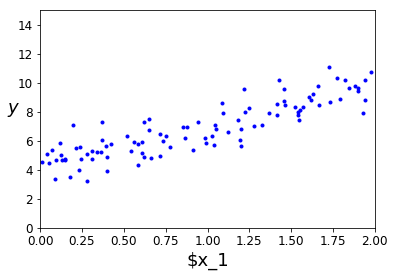

In [6]:
# Create randomly generated linear data set
plt.plot(X, y, "b.")
plt.xlabel("$x_1", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
# save_fig("generated_data_plot")
plt.show()

In [13]:
# Find the value that minimizes the cost function using linear algebra (find Theta-hat)
# We concatenate with the ones column so that the bias parameter is always fully accounted for when doing the dot product
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
# Normal Equation: Theta-hat = (X-transpose * X)^(-1) * X-transpose * y     where * is the dot product
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.21509616],
       [ 2.77011339]])

In [17]:
X_new = np.array([[0], [2]]) # endpoints of graph
X_new_b = np.c_[np.ones((2, 1)), X_new] 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

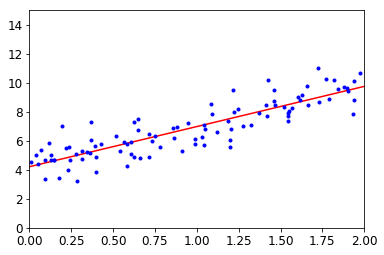

In [18]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [20]:
# Could also use scikit learn library
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.21509616]), array([[ 2.77011339]]))

In [21]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293]])

In [22]:
# Linear regression using batch gradient descent
eta = 0.1 # Learning rate
n_iterations = 1000 # Number of iterations
m = 100 # size of dataset

theta = np.random.randn(2, 1) # random initialization
for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [23]:
theta # To find a good learning rate, it is recommended to use grid search

array([[ 4.21509616],
       [ 2.77011339]])

In [28]:
'''
Stochastic gradient descent computes the gradient from a single instance of the training set
The SGD will bounce around, and after a while, it will reach a good solution, but not the optimal solution
Use a learning schedule to reduce learning rate as you progress
'''
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/ (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [33]:
theta

array([[ 4.22893595],
       [ 2.77725108]])

In [36]:
# Can do the same code with scikit learn SGDRegressor Class
from sklearn.linear_model import SGDRegressor
# Runs 50 epochs, starting learning rate of 0.1, no regularization
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1, random_state=42)
# ravel method transforms y into a 1d array
sgd_reg.fit(X, y.ravel())

C:\Users\Gabe Villasana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [37]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.16782089]), array([ 2.72603052]))

In [39]:
'''
Mini-batch Gradient Descent
Computes gradient based on small random sets of instances called mini-batches
Achieve a performance boost from hardware optimization of matrix operations, especially when using GPUs
'''
n_iterations = 50
minibatch_size = 20

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [40]:
theta # Nice!

array([[ 4.22492326],
       [ 2.77136327]])

In [44]:
'''
Let's take a look at Polynomial Regression which can be used for nonlinear data
'''
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

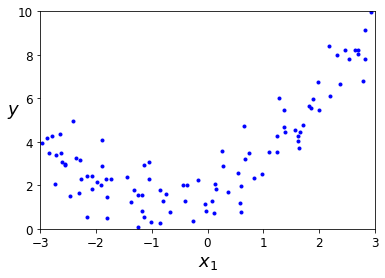

In [45]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [46]:
# Use scikit learn's PolynomialFeatures class to transform data. This can be accomplished by adding the square term
# of each feature in the training set as new features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [47]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.78134581]), array([[ 0.93366893,  0.56456263]]))

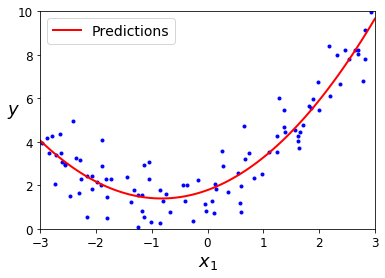

In [49]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [65]:
'''
Can also generalize to higher degree polynomials, but at some point, you are overfitting you training data.
As a result, you must check for over/under fitting. One way to do this is with cross-validation. Another method
commonly employed is to look at the learning curves. To generate the learning curve plots, train the model several
times on different sized subsets of the training data. 
'''
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

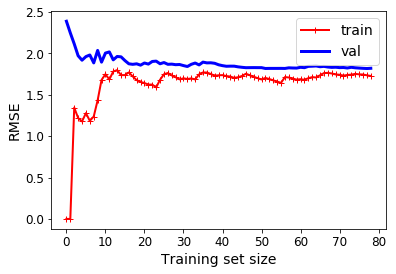

In [66]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

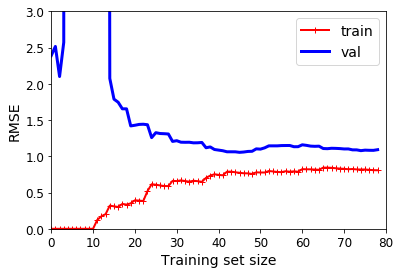

In [67]:
# Now consider a 10th-degree polynomial model on the same data
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("sgd_reg", LinearRegression()),
])

# Error on training data is much lower than with linear model
# Gap between the curves signifies that the model is overfitting as it performs significantly better on training set than val set
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

In [71]:
'''
Regularized Linear Models
'''

# Ridge Regression with closed-form equation
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 4.82497007]])

In [73]:
# Ridge Regression with stochastic gradient descent
sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\Gabe Villasana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 3.82062962])

In [75]:
# Can also use a Lasso Regression, which automatically performs feature selection and outputs a sparse model
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 4.77621741])

In [76]:
# Elastic Net serves as an intermediary between Ridge and Lasso regression
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 4.78114505])

C:\Users\Gabe Villasana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


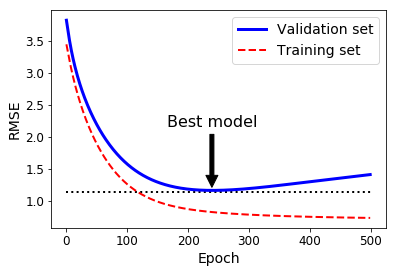

In [80]:
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [81]:
'''
Another way to regularize learning algorithms such as gradient descent is to stop training as soon
as the validation error reaches a minimum. This is known as early stopping
'''
from sklearn.base import clone
# warm_start results in model continuing where it left off rather than retraining each time fit() is called
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Users\Gabe Villasana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [82]:
'''
Logistic Regression
Utilizes a sigmoid function. If the output is >= 0.5, then return 1. Otherwise, return 0. 
Mostly used for classification to determine which class an instance belongs to
The cost function for this problem is given by -log(p-hat) if y = 1, and -log(1 - p-hat) if y = 0
which makes sense because -log(t) grows very large when t approaches 0. As a result, the cost will be large
if the model estimates a probability close to 0 for a positive instance, and it will also be very large if
the model estimates a probability close to 1 for a negative instance. 
'''
# Build a classifier with the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [83]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [93]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

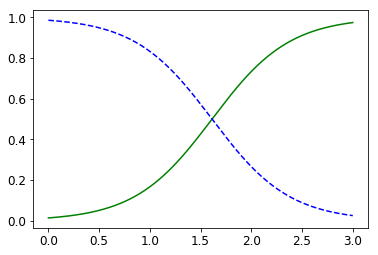

In [110]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# Can add more matplotlib code to make graph look better

In [115]:
# Decision boundary is at 1.6
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([ 1.61561562])

In [116]:
'''
Logistic Regression model can be generalized to support multiple classes directly.
This is known as Softmax Regression, or Multinomial Logistic Regression
'''
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

# multinomial setting results in softmax regression. C is the inverse of alpha (for regularization)
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
# iris with 5 cm long and 2 cm wide petal predicts Iris-Virginica
softmax_reg.predict([[5, 2]])

array([2])

In [118]:
# 94.2% probability that it is Iris-Virginica
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])